In [3]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [5]:
## create a Logistic Regression Object lr

lr = LogisticRegression()

In [6]:
subscribe = pd.read_csv('subscribe.csv')

In [7]:
subscribe.shape

(20, 2)

In [8]:
subscribe.head()

,Age,Subscriptn
0,62,1
1,18,0
2,40,0
3,51,1
4,37,1


In [9]:
import statsmodels.api as sm

In [10]:
x = subscribe['Age']
y = subscribe['Subscriptn']

x = sm.add_constant(x)

In [11]:
logit_model = sm.Logit(y,x)

In [13]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.381287
         Iterations 7


In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Subscriptn   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4459
Time:                        14:19:13   Log-Likelihood:                -7.6257
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                 0.0004593
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0209      4.210     -2.380      0.017     -18.273      -1.769
Age            0.2416      0.100      2.424      0.015       0.046       0.437
==============================================================================
"""

In [14]:
result.summary2() ## check difference instead of running summary run summary2

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.446     
Dependent Variable: Subscriptn       AIC:              19.2515   
Date:               2023-05-15 14:16 BIC:              21.2430   
No. Observations:   20               Log-Likelihood:   -7.6257   
Df Model:           1                LL-Null:          -13.763   
Df Residuals:       18               LLR p-value:      0.00045930
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const   -10.0209     4.2102   -2.3801   0.0173   -18.2728   -1.7690
Age       0.2416     0.0997    2.4242   0.0153     0.0463    0.4370
=================================================================

"""

# Model Validation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [21]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [23]:
## GET PREDICTIONS ON TEST DATA USING TRAINED MODEL
## Store the predictions in y_pred object

y_pred = logreg.predict(x_test)

In [25]:
print(y_pred)

[0 0 0 0 1 0]


In [27]:
print('Accuracy of the Log Regn Classifier on Test Data is : {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of the Log Regn Classifier on Test Data is : 0.67


# Building the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [1 0]]


In [31]:
y_test

17    0
19    0
11    1
18    0
13    0
6     0
Name: Subscriptn, dtype: int64

In [33]:
y_pred

array([0, 0, 0, 0, 1, 0], dtype=int64)

In [35]:
import numpy as np
y_pred_df = pd.DataFrame(y_pred) ## y_pred is in array format so we have to convert into a dataframe if required
y_pred_df

,0
0,0
1,0
2,0
3,0
4,1
5,0


# Confusion Matrix Plot

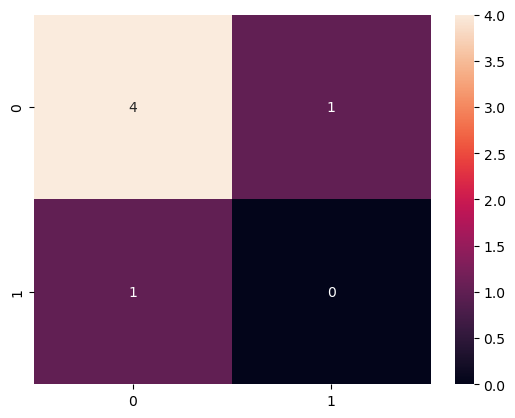

In [37]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot = True)

import matplotlib.pyplot as plt
plt.show()

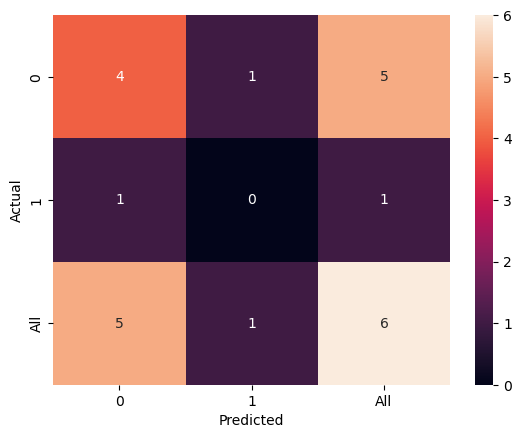

In [39]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

sn.heatmap(confusion_matrix_new, annot=True)
plt.show()

In [41]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.6666666666666666


In [43]:
Overall_Error_Rate = 1 - Accuracy
print(Overall_Error_Rate)

0.33333333333333337


In [45]:
print(metrics.accuracy_score(y_test, y_pred))

0.6666666666666666


In [47]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.0


In [49]:
print( metrics.precision_score(y_test, y_pred))

0.0


In [51]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.0


In [54]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.8


In [55]:
## F- score is the "harmonic mean" of the precision and sensitivity
# it considers both false positive and false negative cases and is good for imbalance datasets
# 2*((prcision * sensitivity) / (precision * sensitivity))

F1_score = metrics.f1_score(y_test, y_pred)

In [57]:
print({"Accuracy": Accuracy, "Precision": Precision, "Sensitivity_recall": Sensitivity_recall, "Specificity":Specificity, "F1_score": F1_score})

{'Accuracy': 0.6666666666666666, 'Precision': 0.0, 'Sensitivity_recall': 0.0, 'Specificity': 0.8, 'F1_score': 0.0}


In [60]:
## Hamming loss is the fraction of target which are misclassified

hamming_loss = metrics.hamming_loss(y_test, y_pred)
hamming_loss

0.3333333333333333

In [62]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive rate":FPR,"False Negative rate": FNR})

{'False Positive rate': 0.19999999999999996, 'False Negative rate': 1.0}


# Build ROC

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test)) # defining Method used for ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1]) # pick the probability data from column 2 which is Index 1

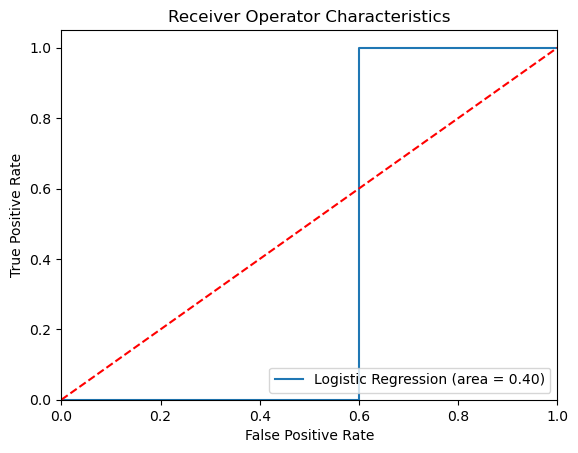

In [70]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operator Characteristics")
plt.legend(loc = 'lower right')
plt.savefig('Plot_ROC') # to save the plot in some object
plt.show()

# not  good try changing the Random State

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [75]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_pred = logreg.predict(x_test)

In [79]:
print(y_pred)

[1 1 1 1 1 0]


In [81]:
print('Accuracy of the Log Regn Classifier on Test Data is : {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of the Log Regn Classifier on Test Data is : 0.33


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1 4]
 [0 1]]


In [86]:
y_test

12    0
16    0
19    0
2     0
15    1
17    0
Name: Subscriptn, dtype: int64

In [88]:
y_pred

array([1, 1, 1, 1, 1, 0], dtype=int64)

In [90]:
y_pred_df = pd.DataFrame(y_pred) ## y_pred is in array format so we have to convert into a dataframe if required
y_pred_df

,0
0,1
1,1
2,1
3,1
4,1
5,0


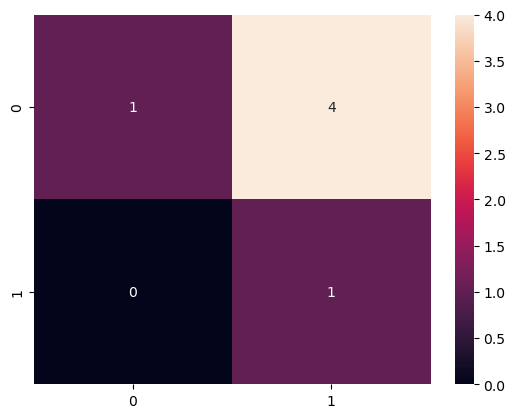

In [92]:
sn.heatmap(confusion_matrix, annot = True)

import matplotlib.pyplot as plt
plt.show()

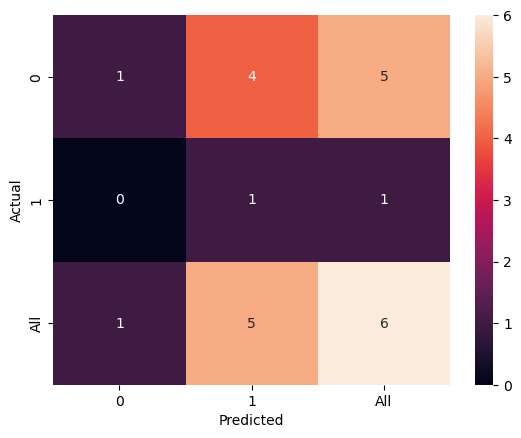

In [94]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

sn.heatmap(confusion_matrix_new, annot=True)
plt.show()

In [96]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.3333333333333333


In [98]:
Overall_Error_Rate = 1 - Accuracy
print(Overall_Error_Rate)

0.6666666666666667


In [100]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.2


In [102]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

1.0


In [104]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.2


In [106]:
F1_score = metrics.f1_score(y_test, y_pred)


In [108]:
print({"Accuracy": Accuracy, "Precision": Precision, "Sensitivity_recall": Sensitivity_recall, "Specificity":Specificity, "F1_score": F1_score})

{'Accuracy': 0.3333333333333333, 'Precision': 0.2, 'Sensitivity_recall': 1.0, 'Specificity': 0.2, 'F1_score': 0.33333333333333337}


In [110]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive rate":FPR,"False Negative rate": FNR})

{'False Positive rate': 0.8, 'False Negative rate': 0.0}


In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [114]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test)) # defining Method used for ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1]) # pick the probability data from column 2 which is Index 1

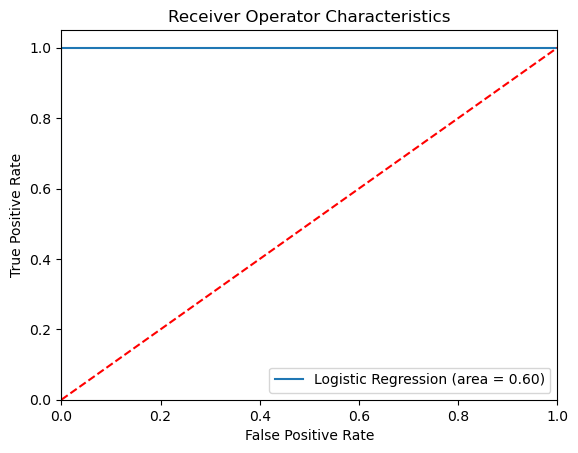

In [115]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operator Characteristics")
plt.legend(loc = 'lower right')
plt.savefig('Plot_ROC') # to save the plot in some object
plt.show()